## Session 9 Machine Learning by Adipta Martulandi
- 19.30 - 19.35 : Announcement
- 19.35 - 20.30 : Sesi 1
- 20.30 - 20.40 : Break
- 20.40 - 21.15 : Sesi 2
- 21.15 - 21.30 : QnA


## announcement
- Informasi Penugasan LMS:
  - Post Test 1: Toolkits - Mastering AI Batch 2 (Deadline Jumat, 5 Januari 2024 Pukul 23.59 WIB) Kesempatan pengerjaan 3x dan akan diambil nilai tertinggi
  - Pre Test 2: Machine Learning Fundamentals - Mastering AI Batch 2 (Deadline Jumat, 5 Januari 2024 Pukul 19.30 WIB) kesempatan pengerjaan 1x
  - Project #1: Data Cleansing & Visualization using Python (Deadline Rabu, 10 Januari 2024 Pukul 23.59 WIB)

- Untuk ketiga penugasan ini tidak ada perpanjangan waktu ya mas jadi bisa ditekankan ke peserta untuk mengerjakan penugasan tepat waktu. Terimakasih mas

In [1]:
!pip install graphviz
!pip install fastbook
!pip install fastai

In [2]:
from fastbook import *

# What is Machine Learning

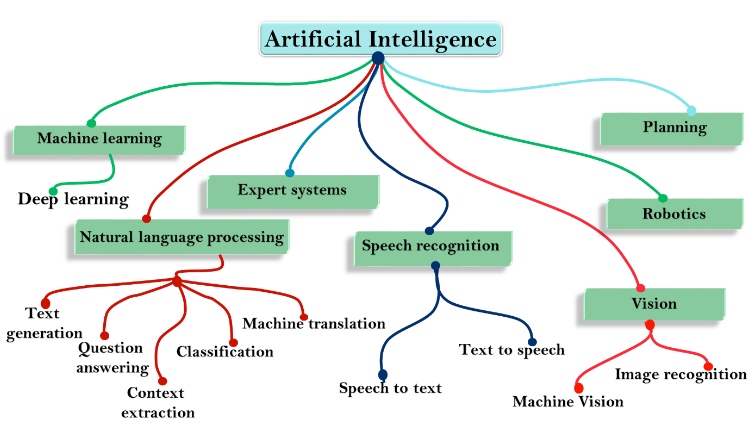

## Artificial Intelligence

> Artificial Intelligence (AI) is a branch of computer science that aims to create systems capable of performing tasks that would normally require human intelligence. These tasks include problem solving, understanding language, recognizing patterns, learning from experience, and making decisions.

## Machine Learning





> Machine Learning algorithms are able to learn without being explicitly programmed.

Instead of writing the rules, we give the computer the data and let the computer learn the rules by itself.

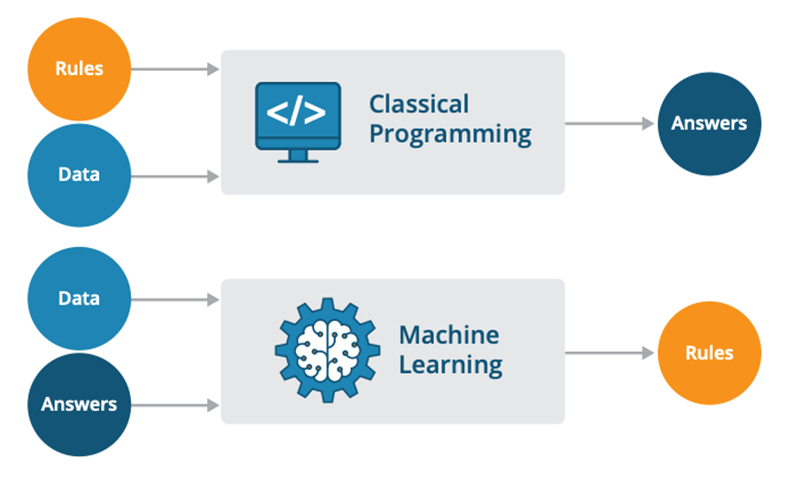

Non-machine learning AIs requires human to program the rules (teach the computer how to do it).

Some example of non-machine learning AIs:

### Rule-base System

In [3]:
# rules
def predict_illness(symptoms: list[str]) -> str:
    if 'fever' in symptoms:
        if 'cough' in symptoms:
            return 'flu'
        elif' sore throat' in symptoms:
            return 'cold'
        elif 'vomitting' in symptoms:
            return 'food poisoning'
        else:
            return 'unknown'
    elif 'rash' in symptoms:
        return 'measles'
    else:
        return 'unknown'

In [4]:
# provide data
print(predict_illness(['fever', 'cough']))
print(predict_illness(['fever', 'vomitting']))

flu
food poisoning


provide -->
1. data 'fever', 'cough'
2. answer food poisoning

result -->
1. rules

Describe to me - in words - how to recognize apple?

![Apple](https://upload.wikimedia.org/wikipedia/commons/thumb/5/5b/The_SugarBee_Apple_now_grown_in_Washington_State.jpg/240px-The_SugarBee_Apple_now_grown_in_Washington_State.jpg)

How about this, is it an apple?

![Cherry](https://upload.wikimedia.org/wikipedia/commons/thumb/f/f6/Cherry_season_%2848216568227%29.jpg/640px-Cherry_season_%2848216568227%29.jpg)

Human learns by examples. We learn to recognize apple by seeing a lot of apple. We learn to recognize cherry by seeing a lot of cherry.

Machine Learning consists of two stages:

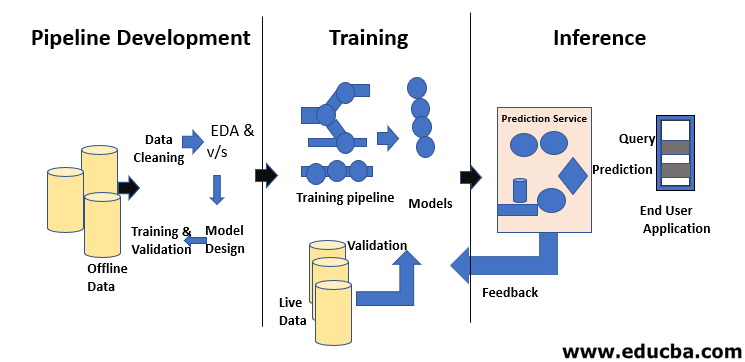

### Training Stage

We only give the computer the data and the expected output. The computer will learn the rules by itself.
The output is the model.

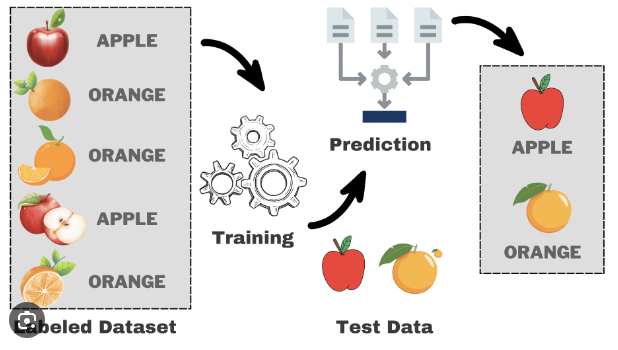

training cuma sekali --> model_v1 --> deploy di server

setelah 1 tahun

performa model turun --> data drift

retraining model

### Inference Stage

Once the model is created, we can use the model to predict the output for **new** data.

https://www.salary.com/

Let's see an example in action.

mau subscribe gmaps --> oke udah subscribe --> udah dapat akses
API KEY

/gmaps/connet/

bikin program map
session.post(endpoint gmaps, request, API_KEY)

### Decision Tree

In [5]:
gv('''
    node [shape=box]
    inputs -> fever [label="symptoms"]
    fever -> cough [label="yes"]
    cough -> sore_throat [label="no"]
    cough -> flu [label="yes"]
    cough -> unknown [label="no"]
    sore_throat -> vomitting [label="yes"]
    sore_throat -> rash [label="no"]
    vomitting -> food_poisoning [label="yes"]
    vomitting -> unknown [label="no"]
    rash -> measles [label="yes"]
    rash -> unknown [label="no"]
''')

ExecutableNotFound: failed to execute Path('dot'), make sure the Graphviz executables are on your systems' PATH

Differs to the traditional programming, we don't need to write the rules. We only need to give the computer the data and the expected output. The computer will build the decision tree by itself.

Let's try to build decision tree to predict whether a titanic passenger survived or not.

In [6]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt
import pandas as pd

# Load the data
url = 'https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv'
df = pd.read_csv(url)
df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
df['Survived'].value_counts() / df.shape[0] * 100

Survived
0    61.616162
1    38.383838
Name: count, dtype: float64

In [8]:
0 80%
1 20%

case imbalance

SyntaxError: invalid syntax (49903229.py, line 1)

Let's preprocess the data first.


In [9]:
# Define the dependent variable
dep_var = 'Survived'

# Define the categorical and continuous variables
cat_names = ['Pclass', 'Sex', 'Embarked']
cont_names = ['Age', 'SibSp', 'Parch', 'Fare']

# Preprocess the data
df = df[cat_names + cont_names + [dep_var]].dropna()
df[cat_names] = df[cat_names].apply(lambda x: pd.factorize(x)[0])

X = df[cat_names + cont_names] #data, features, dimension, columns
y = df[dep_var] #answer, target, label

y = target (orang kantor, orang tidak kantor)

SyntaxError: invalid syntax. Perhaps you forgot a comma? (794465524.py, line 15)

In [10]:
X.head()

NameError: name 'X' is not defined

In [11]:
# Create the decision tree model
tree = DecisionTreeClassifier(max_depth=3)

#training model
tree.fit(X, y)

# Print the decision tree
plt.figure(figsize=(10, 8))
plot_tree(tree, feature_names=cat_names+cont_names, class_names=['Not Survived', 'Survived'], filled=True)
plt.show()

NameError: name 'X' is not defined

#model tadi kita deploy di production server

In [12]:
X.head()

NameError: name 'X' is not defined

In [13]:
# Use the tree to infer

tree.predict([[1, 1, 0, 35.0, 1, 0, 52.1000]])

NotFittedError: This DecisionTreeClassifier instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

## Deep Learning

Deep Learning is a subset of Machine Learning.

Deep Learning was inspired by the structure and function of the brain, namely the interconnecting of many neurons.

However, as the field of AI has grown, and the intricacies of the human brain have been studied more, the inspiration has shifted more towards inspiration by the brain rather than duplication of it.

![](https://upload.wikimedia.org/wikipedia/commons/thumb/1/10/Blausen_0657_MultipolarNeuron.png/375px-Blausen_0657_MultipolarNeuron.png)

ANNs frequently outperform other ML techniques on very large and complex problems

![](https://storage.googleapis.com/rg-ai-bootcamp/machine-learning/neural-network-min.png)